In [ ]:
#Visualize coco predictions

In [ ]:
# !tail -n 1 runs/test/export-preds/best_overall_predictions.json

In [ ]:
!ls /nvmefs1/andrew.mendez/coco/images/val2017/ | grep 298251

In [30]:
import json
from PIL import Image,ImageDraw
import os
from models.models import *
from utils.datasets import *
from utils.general import *

In [31]:
def extract_unique_image_ids(json_data):
    """Extracts all unique image_ids from the json data."""
    return set([int(i['image_id']) for i in json_data])

def filter_annotations_by_image_id(image_id, json_data):
    """Filters annotations for a given image_id."""
    return [item for item in json_data if item['image_id'] == image_id]

def get_image_annotations(image_id, directory, json_data):
    """Returns the filtered list of annotations for a given image_id and the image path."""
    filtered_annotations = filter_annotations_by_image_id(image_id, json_data)
    image_path = os.path.join(directory, f'{str(image_id).zfill(12)}.jpg')
    return filtered_annotations, image_path

In [52]:
names=['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']

# res = json.load(open('runs/test/yolov4-pacsp-export-22/best_overall_predictions.json','r'))
res = json.load(open('runs/test/yolov4-pacsp-a100-300-export3/best_predictions.json','r'))
unique = list(extract_unique_image_ids(res))

# def plot_pred(im_id,path, json):
#     f_anns, image_path = get_image_annotations(im_id,path,json)

#     image = Image.open(image_path)

#     draw = ImageDraw.Draw(image)
#     # Optional: Load a font, if you want a specific font or size
#     # font = ImageFont.truetype("arial.ttf", 15)  # Example: Arial, size 15
#     for box in f_anns:
#         # print(box['score'])
#         if box['score']> 0.4:
#             x, y, w, h = box['bbox']
#             draw.rectangle([x, y, x + w, y + h], outline="red")

#             # Prepare the text to display
#             text = f"ID: {names[box['category_id']]}, Score: {box['score']:.2f}"

#             # Draw text. If you loaded a font, add `, font=font` in the text() function
#             draw.text((x, y), text, fill="yellow")
#     return image
def plot_predictions(image_id, image_directory, annotations_json, threshold=0.4):
    """
    Visualizes object detection predictions on an image.
    
    Args:
        image_id (int): The unique identifier for the image.
        image_directory (str): Path to the directory containing the images.
        annotations_json (list of dict): The JSON data containing the annotations.
        threshold (float): The score threshold for displaying annotations.

    Returns:
        PIL.Image: Image with drawn annotations.
    """
    filtered_annotations, image_path = get_image_annotations(image_id, image_directory, annotations_json)

    # Check if the image file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at {image_path}")

    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Optional: Load a font for text display
    # font = ImageFont.truetype("arial.ttf", 15)  # Replace with the path to your font file

    for annotation in filtered_annotations:
        if annotation['score'] > threshold:
            x, y, w, h = annotation['bbox']
            draw.rectangle([x, y, x + w, y + h], outline="red")

            # Prepare the text to display
            text = f"ID: {names[annotation['category_id']]}, Score: {annotation['score']:.2f}"

            # Draw text with or without a custom font
            draw.text((x, y), text, fill="yellow")  # Add `, font=font` if using a custom font

    return image


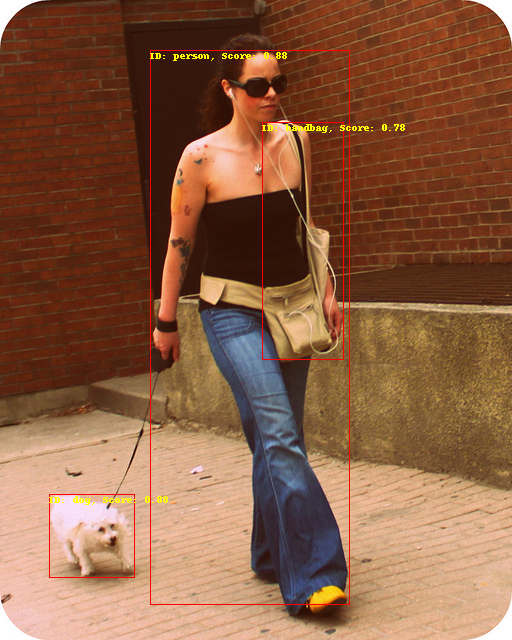

In [53]:
plot_predictions(unique[100],'/nvmefs1/andrew.mendez/coco/images/val2017/',res)

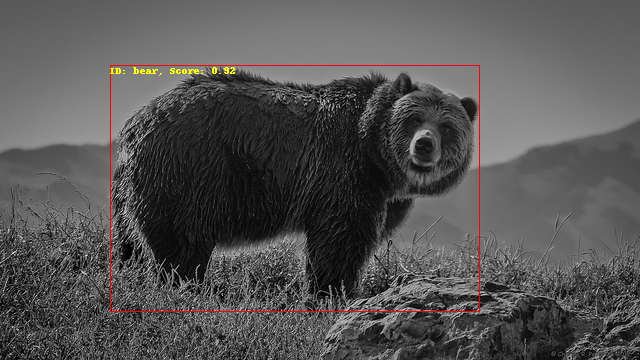

In [54]:

image